In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns
print(f'{sns.__version__}')

0.11.2


In [3]:
df = pd.read_csv('Data.csv')

In [4]:
df.head()

,Crime rate,Number of schools,Number of hospitals,Median selling price,Population,Unemployment rate
0,418.1,135.0,120.0,154850.0,4830081,7.2
1,602.6,54.0,25.0,258200.0,737068,7.0
2,405.8,627.0,106.0,185800.0,6632764,7.7
3,445.7,255.0,100.0,136850.0,2959400,6.9
4,396.2,1028.0,411.0,407200.0,38260787,8.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Crime rate            312 non-null    float64
 1   Number of schools     306 non-null    float64
 2   Number of hospitals   306 non-null    float64
 3   Median selling price  288 non-null    float64
 4   Population            312 non-null    int64  
 5   Unemployment rate     312 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 14.8 KB


In [6]:
df.describe()

,Crime rate,Number of schools,Number of hospitals,Median selling price,Population,Unemployment rate
count,312.000000,306.000000,306.000000,288.000000,3.120000e+02,312.000000
mean,375.329487,307.196078,118.947712,220526.215278,6.250227e+06,5.128526
std,178.641523,287.896545,102.065314,87876.699820,7.076208e+06,1.773017
min,102.600000,1.000000,12.000000,0.000000,5.776010e+05,2.200000
25%,245.150000,115.000000,53.000000,165375.000000,1.790852e+06,3.900000
50%,349.750000,196.000000,102.000000,199375.000000,4.293272e+06,4.850000
75%,448.475000,424.000000,149.750000,258100.000000,7.046670e+06,6.125000
max,1281.900000,1227.000000,603.000000,574400.000000,3.946159e+07,14.500000


In [37]:
df.isnull().sum()

Crime rate               0
Number of schools        6
Number of hospitals      6
Median selling price    24
Population               0
Unemployment rate        0
dtype: int64

In [40]:
data=df.dropna()
data.isnull().sum()


Crime rate              0
Number of schools       0
Number of hospitals     0
Median selling price    0
Population              0
Unemployment rate       0
dtype: int64

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data)

# Convert back to DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)


In [43]:
standardized_df.head()

,Crime rate,Number of schools,Number of hospitals,Median selling price,Population,Unemployment rate
0,0.359306,-0.639930,-0.043539,-0.748669,-0.253997,1.506563
1,1.669452,-0.918813,-0.970563,0.429458,-0.822739,1.368776
2,0.271963,1.054022,-0.180153,-0.395858,-0.003506,1.851029
3,0.555295,-0.226771,-0.238702,-0.953858,-0.513936,1.299883
4,0.203793,2.434662,2.796083,2.127967,4.391352,2.608856


/home/yasir/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


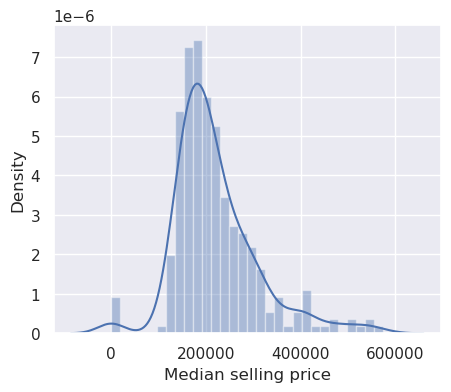

In [16]:
sns.set(rc={'figure.figsize':(5, 4)})
sns.distplot(df['Median selling price'], bins=30)
plt.show()

<AxesSubplot:>

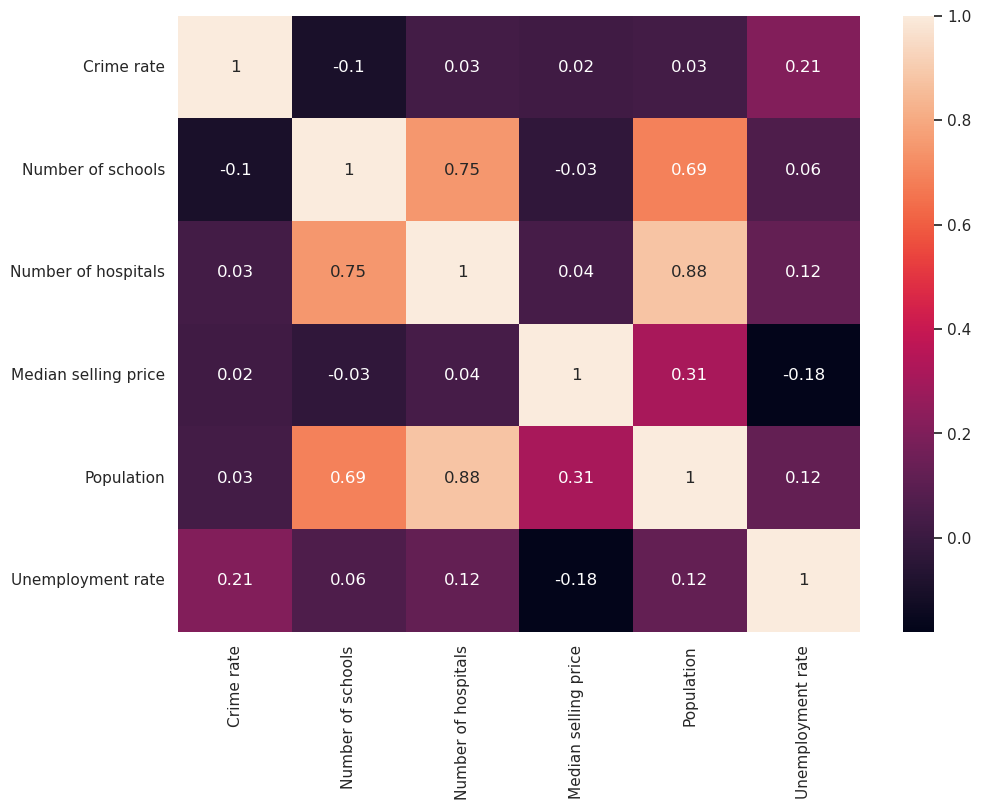

In [19]:
sns.set(rc={'figure.figsize':(11, 8)})
corr_mat = df.corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

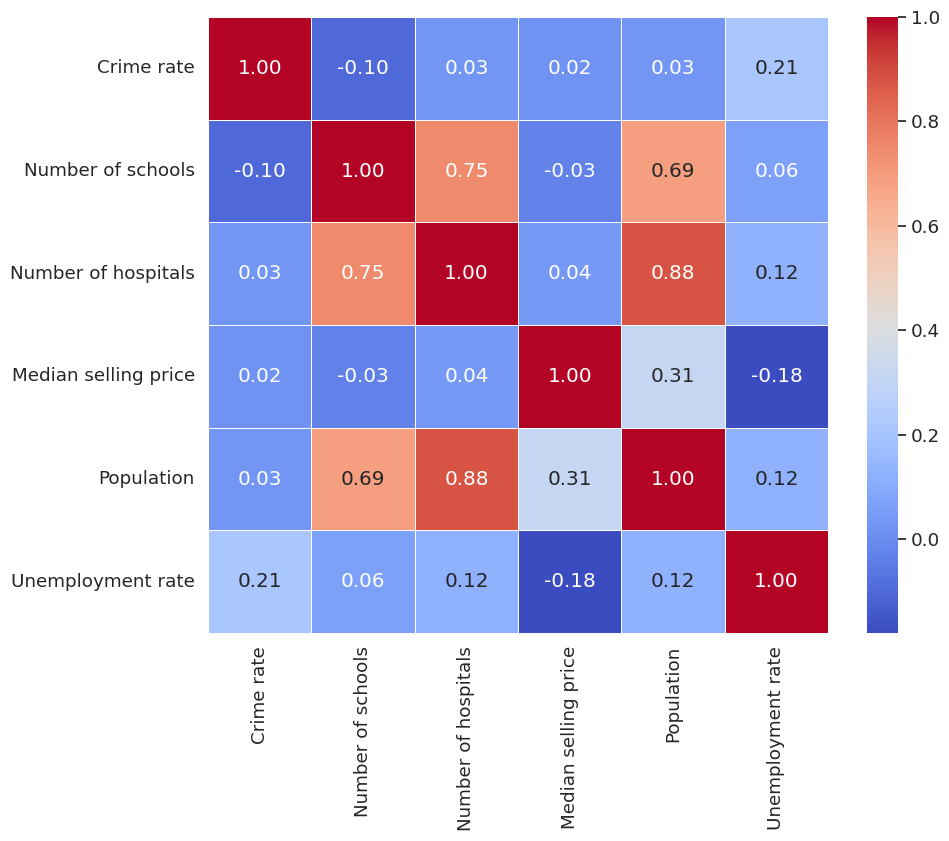

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing data

# Calculate the correlation matrix
corr_mat = df.corr().round(2)

# Display the correlation matrix as a table
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(data=corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


In [58]:
import pandas as pd

# Assuming 'df' is your DataFrame containing data

# Calculate the correlation matrix
corr_mat = df.corr().round(2)

# Display the correlation matrix as a table
print(corr_mat)


                      Crime rate  Number of schools  Number of hospitals  \
Crime rate                  1.00              -0.10                 0.03   
Number of schools          -0.10               1.00                 0.75   
Number of hospitals         0.03               0.75                 1.00   
Median selling price        0.02              -0.03                 0.04   
Population                  0.03               0.69                 0.88   
Unemployment rate           0.21               0.06                 0.12   

                      Median selling price  Population  Unemployment rate  
Crime rate                            0.02        0.03               0.21  
Number of schools                    -0.03        0.69               0.06  
Number of hospitals                   0.04        0.88               0.12  
Median selling price                  1.00        0.31              -0.18  
Population                            0.31        1.00               0.12  
Unemploymen

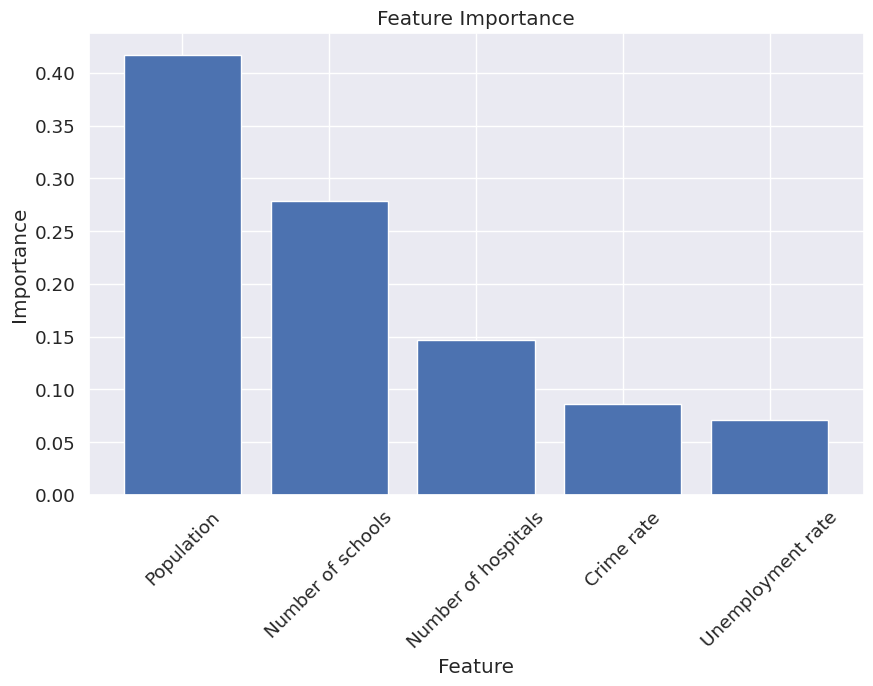

In [64]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np



# Separate features and target variable
X = standardized_df[['Crime rate', 'Number of schools', 'Unemployment rate','Number of hospitals','Population']]
y = standardized_df['Median selling price']

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [65]:
print(feature_importance_df)

               Feature  Importance
4           Population    0.417192
1    Number of schools    0.278876
3  Number of hospitals    0.147135
0           Crime rate    0.086162
2    Unemployment rate    0.070636


In [66]:
feature_importance_df.to_excel('feature_importances.xlsx', index=False)

In [25]:
# Save the correlation matrix to an Excel file
corr_mat.to_excel('correlation_matrix.xlsx', index=True)